In [ ]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
from IPython.display import display

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", "{:.4f}".format)

final_data_path = "../data/final_data.xlsx"
imputed_data_path = "../data/imputed_data.xlsx"
nutrition_data_path = "../data/nutrition_data.xlsx"

final_df = pd.ExcelFile(final_data_path).parse(sheet_name="Sheet2")
imputed_df = pd.ExcelFile(imputed_data_path).parse(sheet_name="Sheet1") # (341, 38)
nutrition_df = pd.ExcelFile(nutrition_data_path).parse(sheet_name="Sheet1") # (2191, 64)

In [ ]:
# THÊM CỘT NUMBER CHO IMPUTED_DATA

imputed_df.insert(0, "number", final_df["number"])


In [ ]:
# ĐỔI TÊN BẢNG DỮ LIỆU DINH DƯỠNG 

column_names_map = {
    "Number": "number",
    "Energy(kcal)": "energy_kcal", 
    "Crude_Protein(g)": "crude_protein_g", 
    "Crude_Fat(g)": "crude_fat_g", 
    "Total_Carbohydrate(g)": "total_carbohydrate_g", 
    "Water(g)": "water_g", 
    "Fruits": "fruits", 
    "Vegetables": "vegetables", 
    "WholeGrainsAndRoots": "whole_grains_roots", 
    "protein(LowFat)": "protein_low_fat", 
    "protein(MediumFat)": "protein_medium_fat", 
    "protein(HighFat)": "protein_high_fat", 
    "protein(SuperHighFat)": "protein_superhigh_fat", 
    "Dairy(Skim)": "dairy_skim", 
    "Dairy(LowFat)": "dairy_low_fat", 
    "Dairy(WholeFat)": "dairy_whole_fat", 
    "Oils_Nuts_And_Seeds": "oils_nuts_and_seeds", 
    "Total_Polyunsaturated_Fatty_Acids(g)": "total_polyunsaturated_fatty_acids_g", 
    "Total_Monounsaturated_Fatty_Acids(g)": "total_monounsaturated_fatty_acids_g", 
    "Total_Saturated_Fatty_Acids(g)": "total_saturated_fatty_acids_g", 
    "CrudeFiber(g)": "crude_fiber_g", 
    "Dietary_Fiber(g)": "dietary_fiber_g", 
    "Total_Sugar(g)": "total_sugar_g", 
    "Glucose(g)": "glucose_g", 
    "Fructose(g)": "fructose_g", 
    "Maltose(g)": "maltose_g", 
    "Sucrose(g)": "sucrose_g",
    "Lactose(g)": "lactose_g", 
    "Cholesterol(mg)": "cholesterol_mg", 
    "Sodium(mg)": "sodium_mg", 
    "Potassium(mg)": "potassium_mg", 
    "Calcium(mg)": "calcium_mg", 
    "Magnesium(mg)": "magnesium_mg", 
    "Phosphorus(mg)": "phosphorus_mg", 
    "Iron(mg)": "iron_mg", 
    "Zinc(mg)": "zinc_mg", 
    "VitaminB1(Thiamin)(mg)": "vitamin_b1_mg", 
    "VitaminB2(Riboflavin)(mg)": "vitamin_b2_mg", 
    "Niacin(mg)": "niacin_mg", 
    "VitaminB6(mg)": "vitamin_b6_mg", 
    "VitaminB12(ug)": "vitamin_b12_ug", 
    "FolicAcid(ug)": "folicacid_ug", 
    "VitaminC(mg)": "vitaminc_mg",
    "TotalVitaminA(I.U.)": "totalVitaminA_ui", 
    "TotalVitaminE(mg)": "totalVitaminE_mg", 
    "trans_fat": "trans_fat", 
    "Threonine(mg)": "threonine_mg", 
    "Valine(mg)": "valine_mg", 
    "Methionine(mg)": "methionine_mg", 
    "Isoleucine(mg)": "isoleucine_mg", 
    "Leucine(mg)": "leucine_mg", 
    "Phenylalanine(mg)": "phenylalanine_mg", 
    "Lysine(mg)": "lysine_mg", 
    "Histidine(mg)": "histidine_mg", 
    "Tryptophan(mg)": "tryptophan_mg", 
    "Alanine(mg)": "alanine_mg", 
    "Arginine(mg)": "arginine_mg", 
    "AsparticAcid(mg)": "aspartic_mg", 
    "GlutamicAcid(mg)": "glutamic_mg", 
    "Glycine(mg)": "glycine_mg", 
    "Proline(mg)": "proline_mg", 
    "Serine(mg)": "serine_mg", 
    "Tyrosine(mg)": "tyrosine_mg", 
    "Cystine(mg)": "cystine_mg"           
}

nutrition_df.rename(columns=column_names_map, inplace=True)

In [ ]:
# XEM XÉT BẢNG DỮ LIỆU DINH DƯỠNG 

# nutrition_df.info() # 2191 dòng, 64 cột, toàn bộ là dữ liệu float, kiểu dữ liệu phù hợp, có một số cột thiếu, mức độ thiếu không nhiều
# nutrition_df["number"].duplicated().sum() # không có giá trị lặp lại ở cột number
nutrition_df.describe() # thống kê mô tả ban đầu không ghi nhận bất thường, có một vài cột có giá trị min = 0 

,energy_kcal,crude_protein_g,crude_fat_g,total_carbohydrate_g,water_g,fruits,vegetables,whole_grains_roots,protein_low_fat,protein_medium_fat,protein_high_fat,protein_superhigh_fat,dairy_skim,dairy_low_fat,dairy_whole_fat,oils_nuts_and_seeds,total_polyunsaturated_fatty_acids_g,total_monounsaturated_fatty_acids_g,total_saturated_fatty_acids_g,crude_fiber_g,dietary_fiber_g,total_sugar_g,glucose_g,fructose_g,maltose_g,sucrose_g,lactose_g,cholesterol_mg,sodium_mg,potassium_mg,calcium_mg,magnesium_mg,phosphorus_mg,iron_mg,zinc_mg,vitamin_b1_mg,vitamin_b2_mg,niacin_mg,vitamin_b6_mg,vitamin_b12_ug,folicacid_ug,vitaminc_mg,totalVitaminA_ui,totalVitaminE_mg,trans_fat,threonine_mg,valine_mg,methionine_mg,isoleucine_mg,leucine_mg,phenylalanine_mg,lysine_mg,histidine_mg,tryptophan_mg,alanine_mg,arginine_mg,aspartic_mg,glutamic_mg,glycine_mg,proline_mg,serine_mg,tyrosine_mg,cystine_mg
count,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2191.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2171.0000,2173.0000,2172.0000,2172.0000,2172.0000,2172.0000,2171.0000,2171.0000,2171.0000,2171.0000,2173.0000,2171.0000,2173.0000,2173.0000,2173.0000,2173.0000,2173.0000,2172.0000,2172.0000
mean,1586.5302,60.2477,61.0790,189.0442,320.3205,0.6297,1.4571,9.5150,1.9513,2.4353,0.2979,0.2277,0.0102,0.2734,0.4753,6.1498,6017.4290,7539.8613,8250.6207,0.0193,6.9318,18.6046,2.3127,2.5182,0.5431,4.3713,5.0511,135.3587,2202.6032,849.5185,261.6436,108.6863,410.1932,4.7581,4.0513,0.4115,0.4885,5.1905,0.4925,2.6196,85.9242,44.1605,2085.9162,8.0948,114.8149,896.7040,1102.3703,502.6188,989.4708,1835.2432,1041.6155,1482.6768,679.5147,215.1192,1127.6237,1312.0542,1912.4529,4451.7497,965.9760,1448.4813,1062.7592,852.3107,696.5058
std,468.2643,22.1570,24.8086,62.9096,298.2933,0.9939,1.2301,3.5999,1.9796,1.8493,0.7391,0.5849,0.0813,0.5432,0.7214,3.0776,7843.2778,8567.6348,9175.6263,0.8988,5.4115,18.4829,3.8364,4.1028,1.1536,7.0672,47.5329,166.6773,1870.2840,917.4115,432.4035,123.4800,353.6836,8.5655,3.6223,0.4123,0.4999,5.0350,0.8287,6.4542,85.1287,79.6019,3954.5337,12.8323,177.4555,957.6107,1151.2566,547.2216,1039.3847,1925.3240,1070.1107,1663.6431,732.3731,240.4333,1222.2164,1448.2822,2068.0536,4549.1306,1074.1308,1520.6524,1081.5919,893.6416,850.1524
min,207.5000,8.4680,5.2320,25.6674,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1276.7906,45.2682,43.9797,146.7345,84.5927,0.0000,0.6503,7.1291,0.4000,1.0351,0.0000,0.0000,0.0000,0.0000,0.0000,3.9000,791.5753,1483.1437,1368.4280,0.0000,3.1160,4.1920,0.0220,0.0000,0.0000,0.0000,0.0000,8.6520,867.8860,262.6340,35.7600,44.5012,148.5440,1.2510,1.6300,0.1370,0.1040,1.6846,0.1200,0.1296,25.4272,1.4794,101.9160,1.1780,0.0000,202.5000,268.8360,99.2685,231.1784,461.7000,266.0460,259.2703,153.0369,36.3398,253.8900,286.4575,425.2800,1004.7350,212.2679,300.3330,263.5500,209.1400,115.2616
50%,1546.0650,57.7018,58.2383,184.7392,234.6654,0.0000,1.2000,9.3550,1.5000,2.0991,0.0000,0.0000,0.0000,0.0000,0.0000,5.7500,2839.1595,4407.7338,5105.8030,0.0000,5.8451,14.4395,0.9030,0.9152,0.0000,1.1000,0.0000,62.9640,1904.2164,593.6780,119.5879,81.3552,309.9416,2.7536,3.0392,0.2785,0.3307,3.5892,0.3020,0.7405,59.3920,14.7700,527.7903,3.5467,0.4000,557.8140,703.2735,311.4100,628.2125,1176.1362,674.0000,869.2901,424.1800,130.7151,681.8340,799.2400,1173.726

In [ ]:
# ĐÁNH GIÁ MỨC ĐỘ THIẾU DỮ LIỆU DINH DƯỠNG 

nutrition_cols = nutrition_df.columns

high_missing_cols = []

for col in nutrition_cols: 
    missing_percent = (nutrition_df[col].isna().mean() * 100).round(2)
    if missing_percent > 40:
        high_missing_cols.append(col)
    # print(f"The {col} column has a missing data rate of {missing_percent}%.")

In [ ]:
# ĐIỀN GIÁ TRỊ THIẾU TRONG DỮ LIỆU DINH DƯỠNG BẰNG MEDIAN 

nutrition_df = nutrition_df.fillna(nutrition_df.median(numeric_only=True))

# chú ý cách lập luận tại sao lại chọn điền bằng median

In [ ]:
imputed_df["number"] = imputed_df["number"].astype(str).str.strip()
nutrition_df["number"] = nutrition_df["number"].astype(str).str.strip()


In [ ]:
# GỘP IMPUTED DATA VỚI NUTRITION DATA

merged_df = pd.merge(imputed_df, nutrition_df, how="left", on="number").reset_index(drop=True)

In [ ]:
# ĐÁNH GIÁ MỨC ĐỘ THIẾU CỦA CƠ SỞ DỮ LIỆU SAU GỘP 

merged_cols = merged_df.columns

high_missing_cols = []

for col in merged_cols: 
    missing_percent = (merged_df[col].isna().mean() * 100).round(2)
    if missing_percent > 40:
        high_missing_cols.append(col)
    print(f"The {col} column has a missing data rate of {missing_percent}%.")

The number column has a missing data rate of 0.0%.
The age column has a missing data rate of 0.0%.
The zbmi column has a missing data rate of 0.0%.
The insulin column has a missing data rate of 0.0%.
The glucose_ac column has a missing data rate of 0.0%.
The cholesterol column has a missing data rate of 0.0%.
The TG column has a missing data rate of 0.0%.
The HDL column has a missing data rate of 0.0%.
The cortisol column has a missing data rate of 0.0%.
The waist column has a missing data rate of 0.0%.
The hip column has a missing data rate of 0.0%.
The SBP column has a missing data rate of 0.0%.
The DBP column has a missing data rate of 0.0%.
The CPP column has a missing data rate of 0.0%.
The sex column has a missing data rate of 0.0%.
The family_income column has a missing data rate of 0.0%.
The pregnancy_smoking column has a missing data rate of 0.0%.
The GDM column has a missing data rate of 0.0%.
The gestational_weight_gain column has a missing data rate of 0.0%.
The preterm_bir

<Axes: >

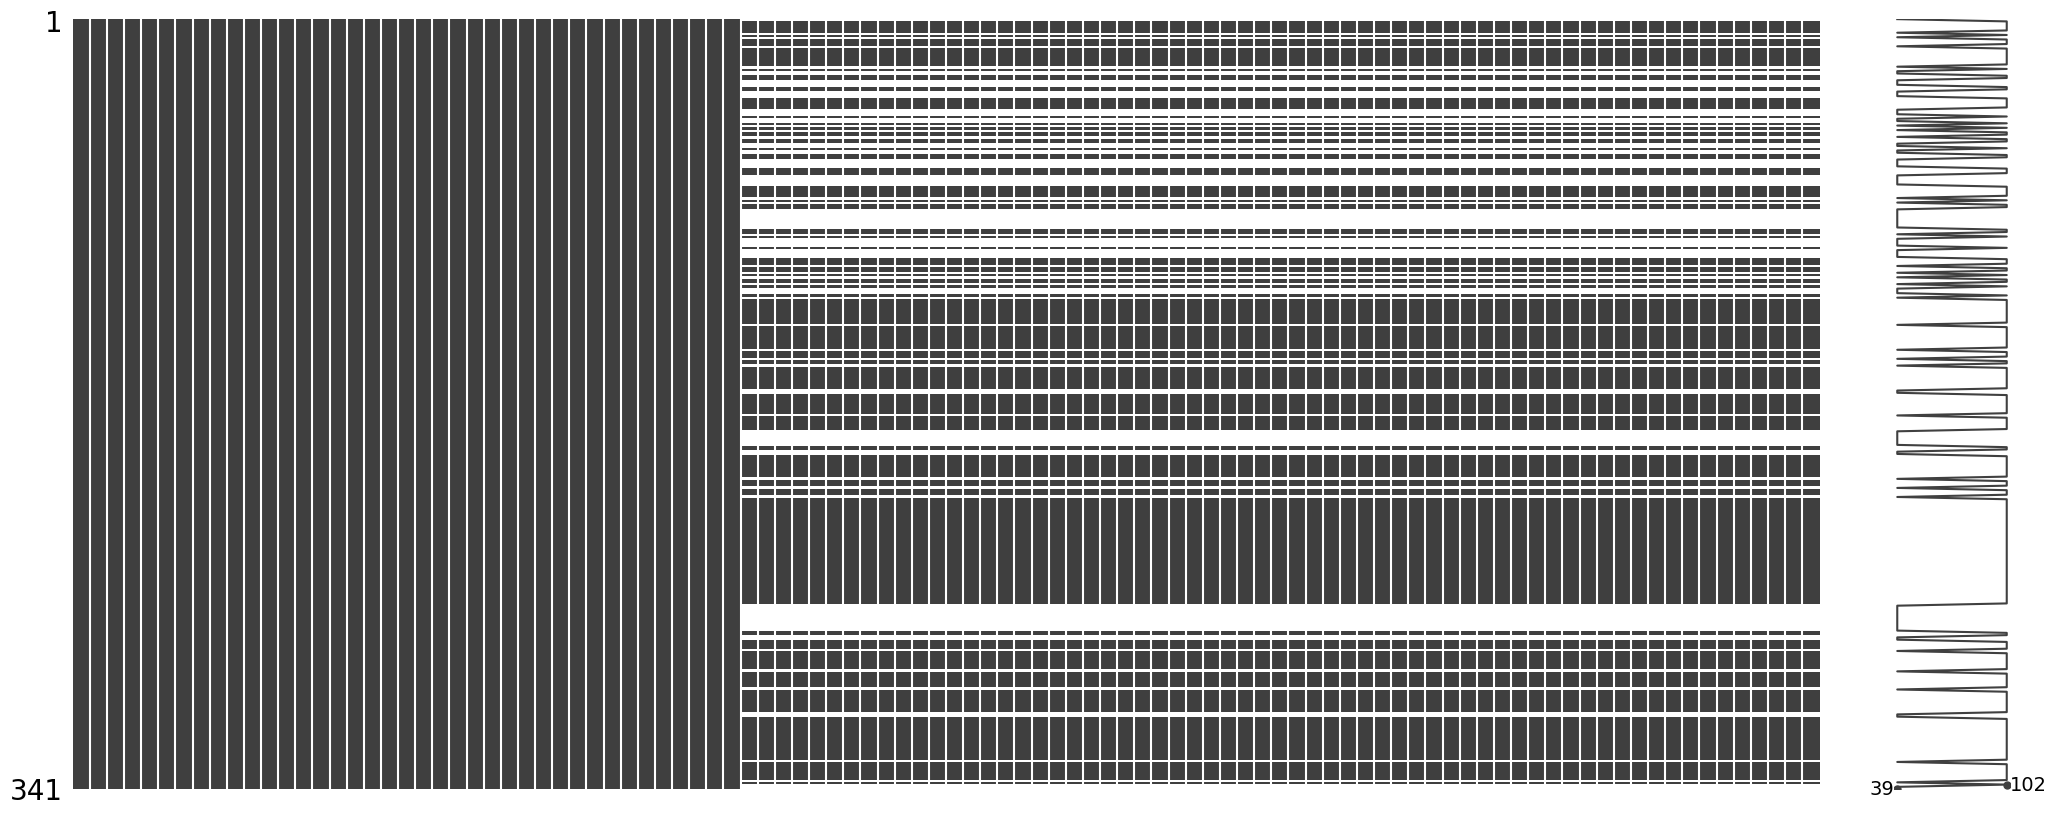

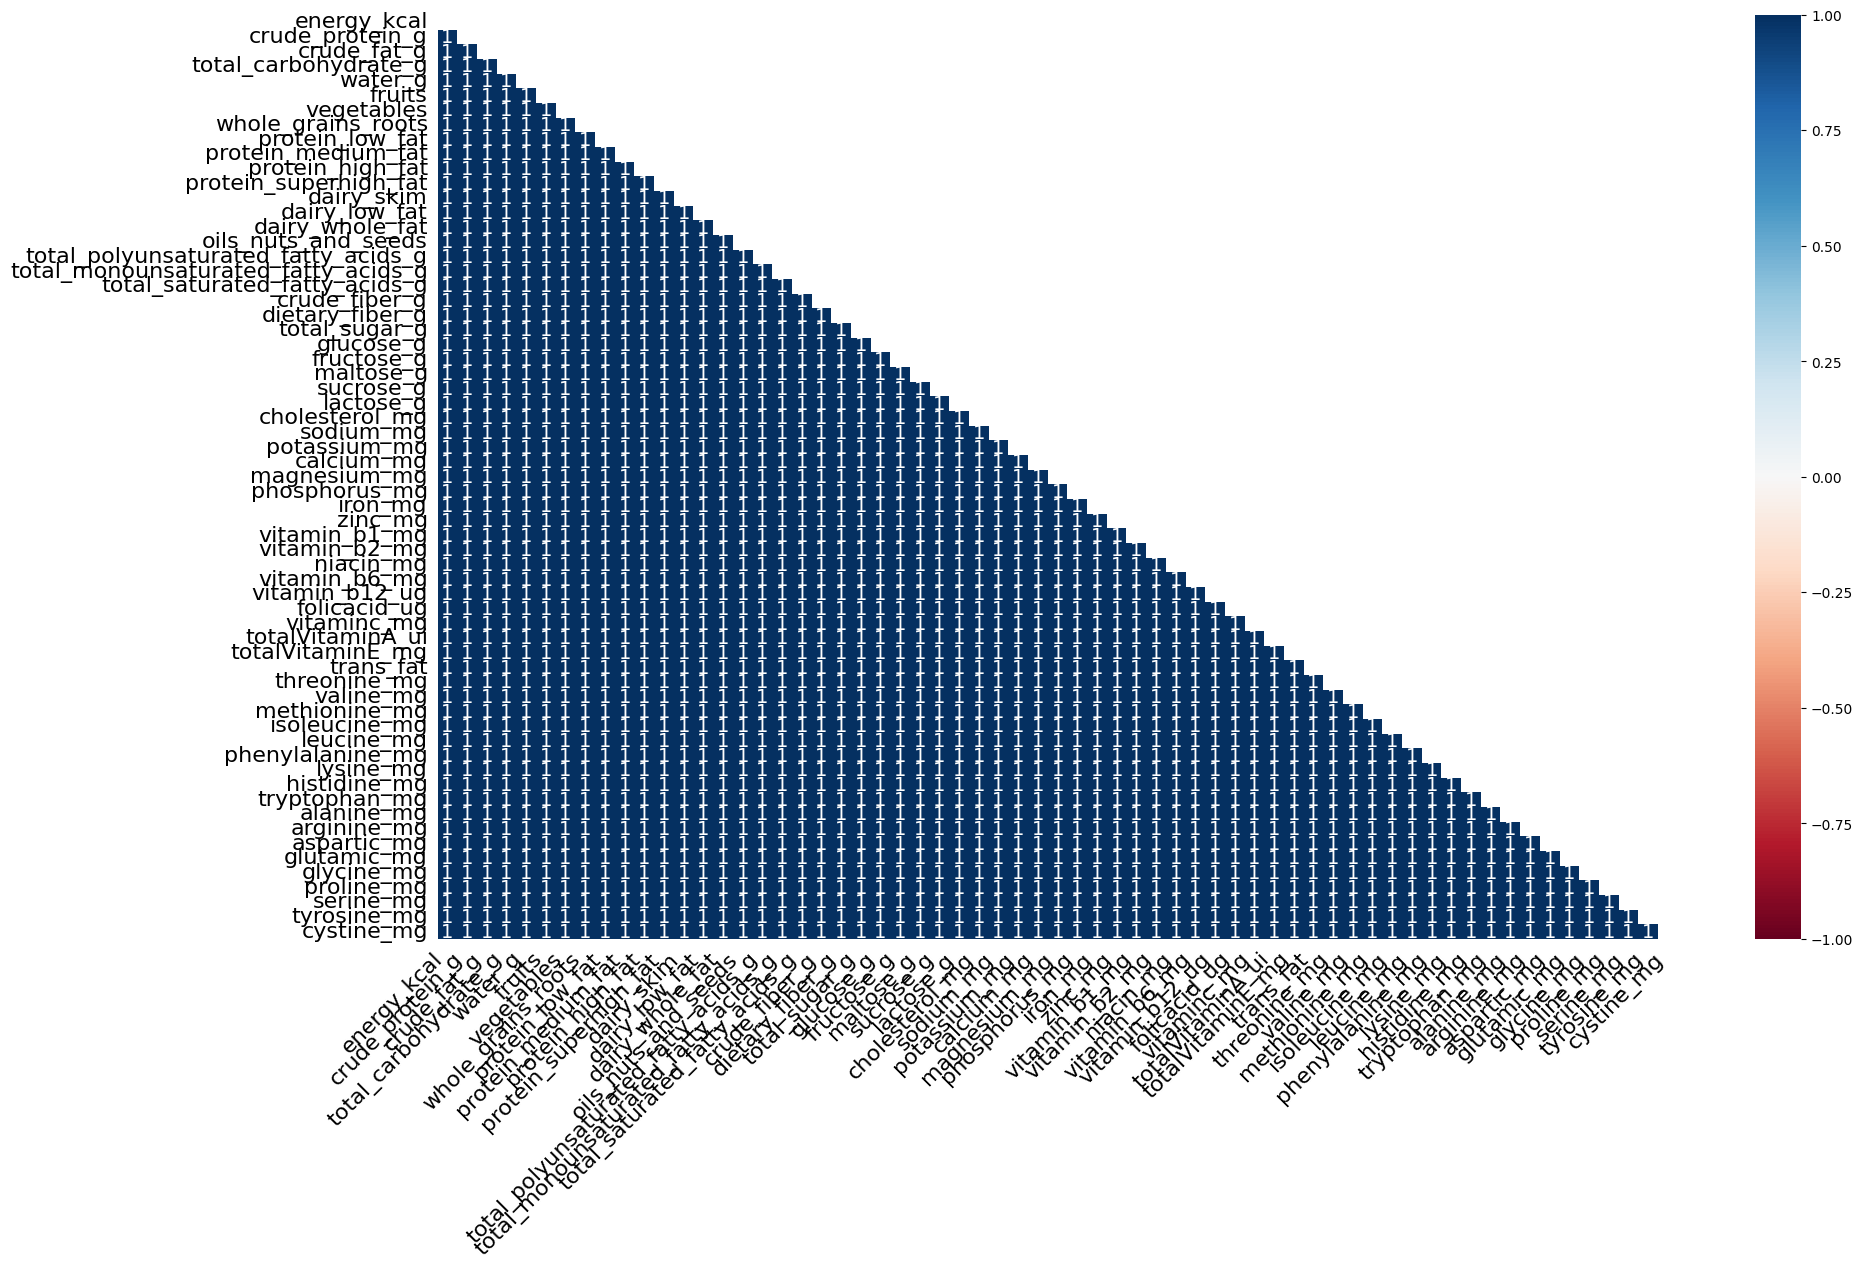

In [ ]:
import missingno as msno

msno.matrix(merged_df)
msno.heatmap(merged_df)

In [ ]:
complete_df = merged_df.dropna().reset_index(drop=True)

# print("Số hàng trước khi lọc:", merged_df.shape[0]) # Số hàng trước khi lọc: 341
# print("Số hàng sau khi lọc:", complete_df.shape[0]) # Số hàng sau khi lọc: 237

# complete_df.to_excel("../data/complete_data.xlsx", index=False)

complete_df.shape